In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import json

In [2]:
db = json.load(open("datasets/usda_food/database.json"))

In [39]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [ ]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head(7)

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [44]:
missing_count = sum(
    1 for item in db
    if not item.get("nutrients") or len(item["nutrients"]) == 0
)
print(f" Bản ghi có {missing_count} giá trị bị thiếu.")

 Bản ghi có 0 giá trị bị thiếu.


In [16]:
groups = [item.get("group", "Unknown") for item in db]
unique_groups = set(groups)
print(f" Có {len(unique_groups)} nhóm thực phẩm khác nhau.")


 Có 25 nhóm thực phẩm khác nhau.


In [19]:
group_counts = defaultdict(int)
for g in groups:
    group_counts[g] += 1

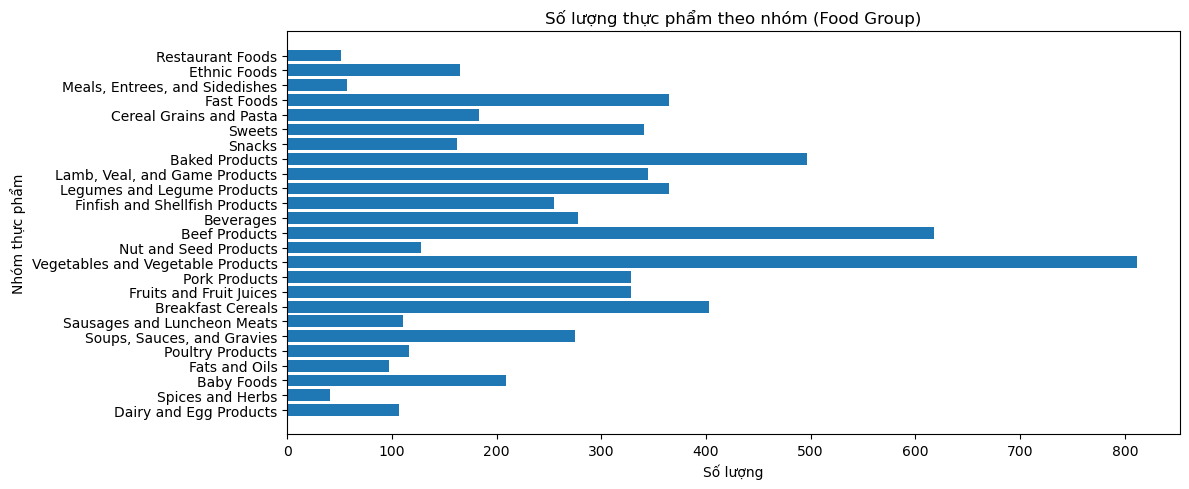

In [20]:
plt.figure(figsize=(12, 5))
plt.barh(list(group_counts.keys()), list(group_counts.values()))
plt.title("Số lượng thực phẩm theo nhóm (Food Group)")
plt.xlabel("Số lượng")
plt.ylabel("Nhóm thực phẩm")
plt.tight_layout()
plt.show()

In [21]:
nutrient_summary = defaultdict(list)

for item in db:
    for nutr in item.get("nutrients", []):
        name = nutr.get("description")
        value = nutr.get("value")
        if isinstance(value, (int, float)):
            nutrient_summary[name].append(value)

# Tính trung bình mỗi chất dinh dưỡng
nutrient_means = {k: np.mean(v) for k, v in nutrient_summary.items() if len(v) > 0}


In [22]:
top_nutrients = dict(sorted(nutrient_means.items(), key=lambda x: x[1], reverse=True)[:15])


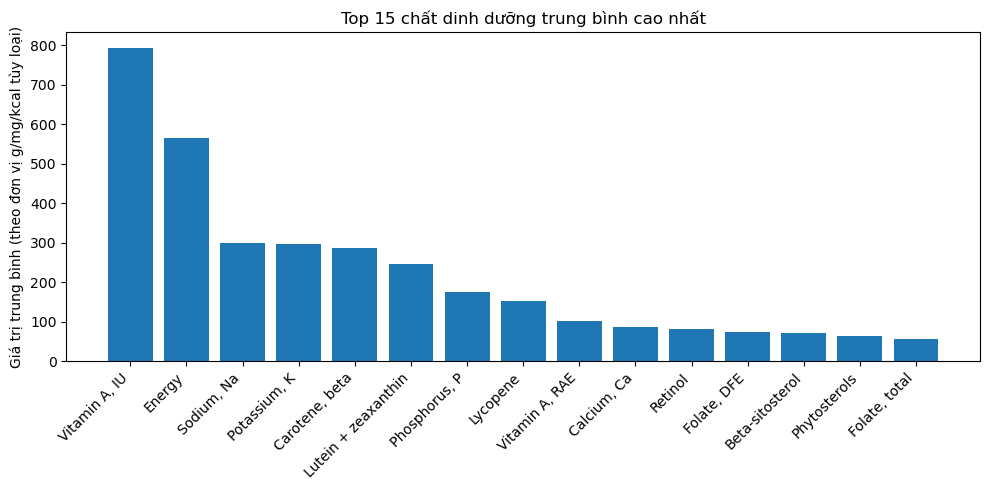

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(top_nutrients.keys(), top_nutrients.values())
plt.xticks(rotation=45, ha="right")
plt.title("Top 15 chất dinh dưỡng trung bình cao nhất")
plt.ylabel("Giá trị trung bình (theo đơn vị g/mg/kcal tùy loại)")
plt.tight_layout()
plt.show()


In [24]:

protein_by_group = defaultdict(list)

for item in db:
    group = item.get("group", "Unknown")
    for nutr in item.get("nutrients", []):
        if nutr.get("description") == "Protein":
            protein_by_group[group].append(nutr.get("value", 0))

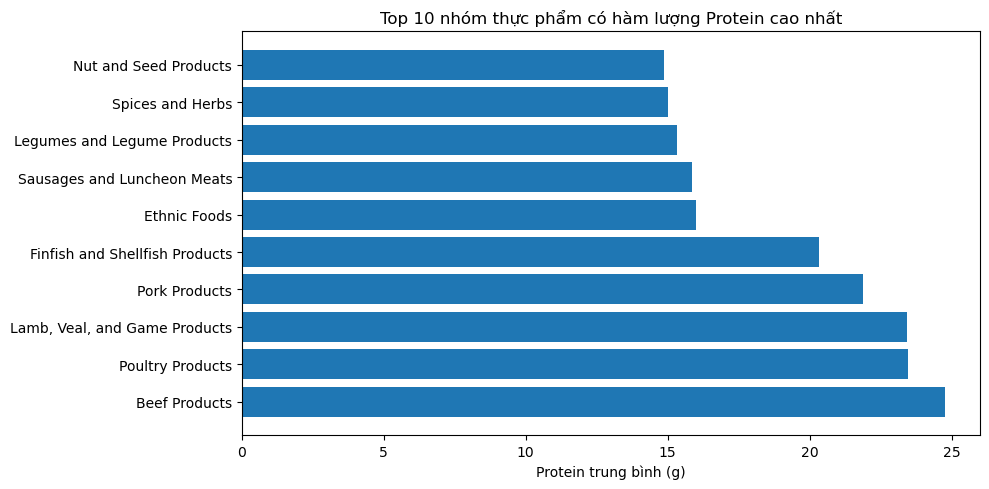

In [25]:
protein_mean_group = {g: np.mean(v) for g, v in protein_by_group.items() if len(v) > 0}
top_protein = dict(sorted(protein_mean_group.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure(figsize=(10, 5))
plt.barh(list(top_protein.keys()), list(top_protein.values()))
plt.title("Top 10 nhóm thực phẩm có hàm lượng Protein cao nhất")
plt.xlabel("Protein trung bình (g)")
plt.tight_layout()
plt.show()

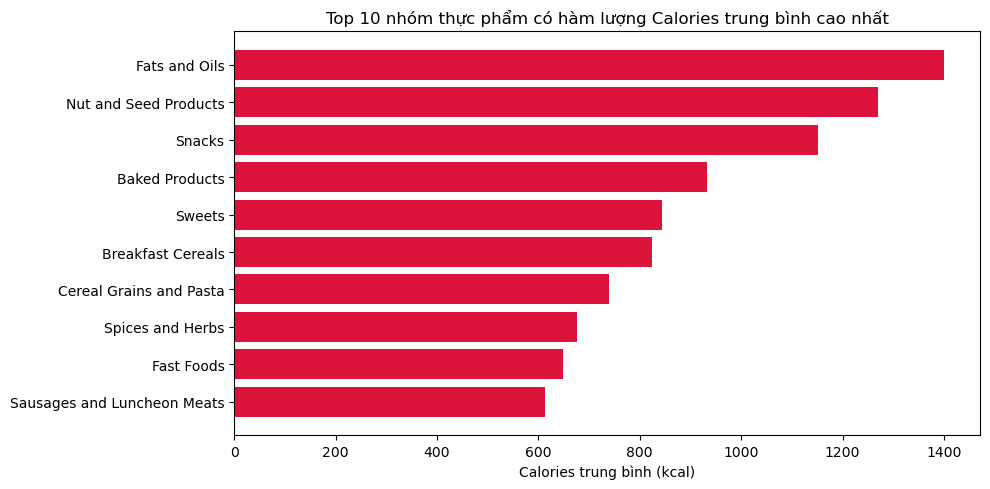

In [28]:
calories_by_group = defaultdict(list)

for item in db:
    group = item.get("group", "Unknown")
    for nutr in item.get("nutrients", []):
        if nutr.get("description") == "Energy":
            calories_by_group[group].append(nutr.get("value", 0))

calories_mean_group = {g: np.mean(v) for g, v in calories_by_group.items() if len(v) > 0}
top_calorie_groups = dict(sorted(calories_mean_group.items(), key=lambda x: x[1], reverse=True)[:10])

plt.figure(figsize=(10, 5))
plt.barh(list(top_calorie_groups.keys()), list(top_calorie_groups.values()), color="crimson")
plt.title("Top 10 nhóm thực phẩm có hàm lượng Calories trung bình cao nhất")
plt.xlabel("Calories trung bình (kcal)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


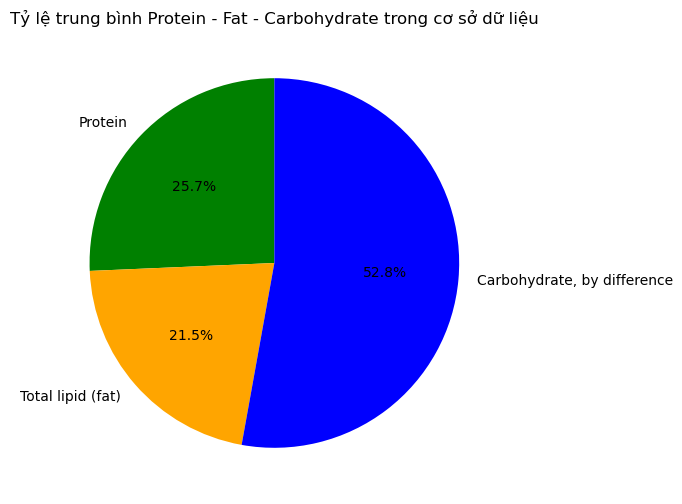

In [29]:
labels = ["Protein", "Total lipid (fat)", "Carbohydrate, by difference"]
values = [np.mean(nutrient_summary[n]) for n in labels if n in nutrient_summary]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90, colors=["green", "orange", "blue"])
plt.title("Tỷ lệ trung bình Protein - Fat - Carbohydrate trong cơ sở dữ liệu")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


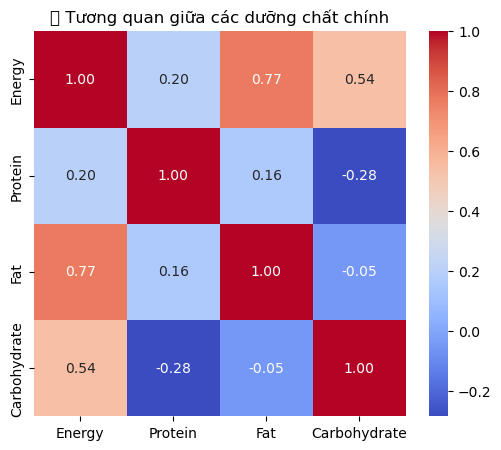

In [33]:
nutrient_summary = defaultdict(list)
for item in db:
    nutrients = {nutr["description"]: nutr["value"] for nutr in item.get("nutrients", []) if isinstance(nutr.get("value"), (int, float))}
    nutrient_summary["Energy"].append(nutrients.get("Energy", np.nan))
    nutrient_summary["Protein"].append(nutrients.get("Protein", np.nan))
    nutrient_summary["Fat"].append(nutrients.get("Total lipid (fat)", np.nan))
    nutrient_summary["Carbohydrate"].append(nutrients.get("Carbohydrate, by difference", np.nan))

import pandas as pd
df = pd.DataFrame(nutrient_summary)

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("🔗 Tương quan giữa các dưỡng chất chính")
plt.show()

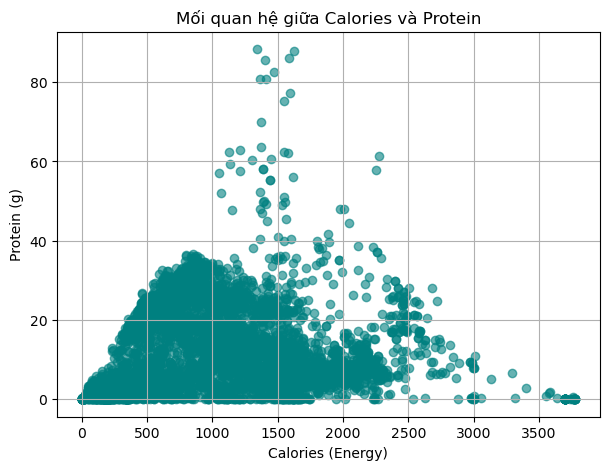

In [34]:
plt.figure(figsize=(7, 5))
plt.scatter(df["Energy"], df["Protein"], alpha=0.6, color="teal")
plt.title("Mối quan hệ giữa Calories và Protein")
plt.xlabel("Calories (Energy)")
plt.ylabel("Protein (g)")
plt.grid(True)
plt.show()


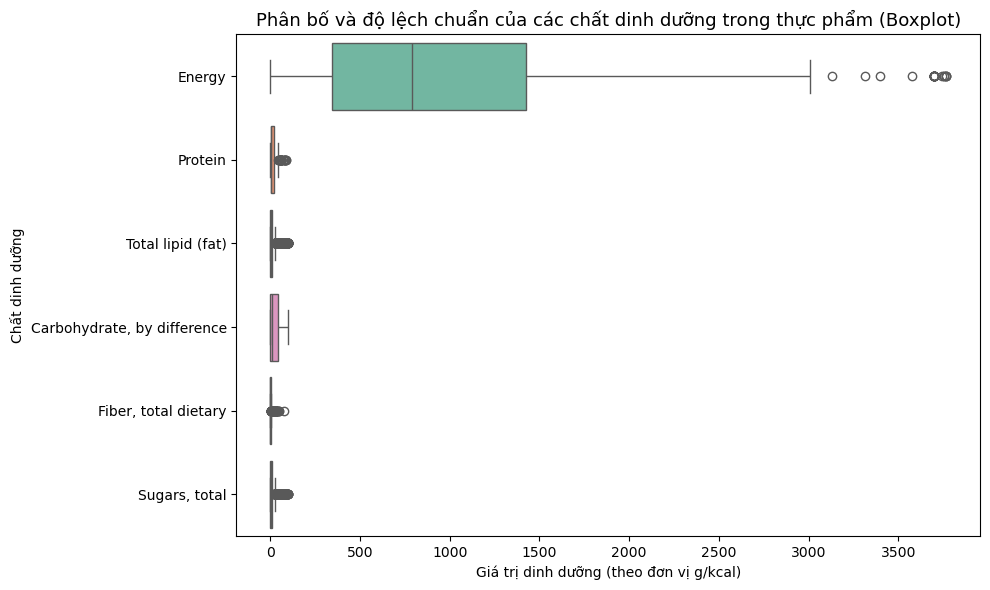

In [47]:


records = []
for item in db:
    nutrients = {n["description"]: n["value"] for n in item["nutrients"]}
    rec = {"description": item["description"], "group": item["group"]}
    rec.update(nutrients)
    records.append(rec)

df = pd.DataFrame(records)
nutrients = ["Energy", "Protein", "Total lipid (fat)", 
             "Carbohydrate, by difference", "Fiber, total dietary", "Sugars, total"]

df_nutr = df[nutrients].dropna()

plt.figure(figsize=(10,6))
sns.boxplot(data=df_nutr, orient='h', palette="Set2")
plt.title("Phân bố và độ lệch chuẩn của các chất dinh dưỡng trong thực phẩm (Boxplot)", fontsize=13)
plt.xlabel("Giá trị dinh dưỡng (theo đơn vị g/kcal)")
plt.ylabel("Chất dinh dưỡng")
plt.tight_layout()
plt.show()



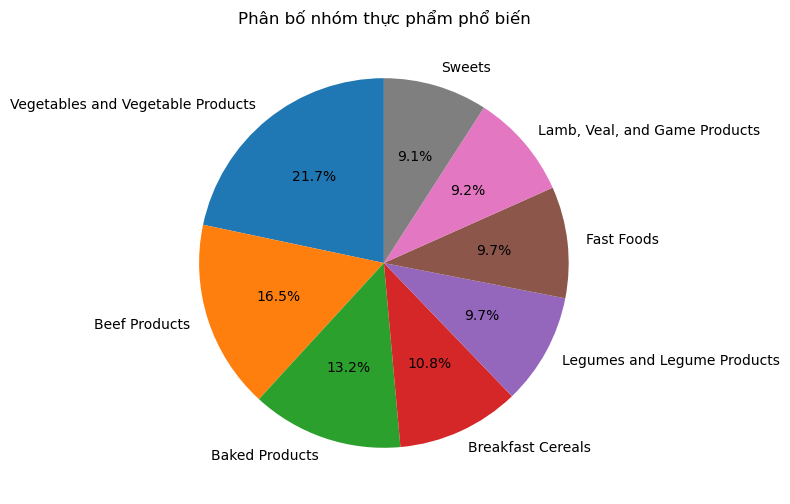

In [38]:
from collections import Counter

group_counts = Counter([item.get("group", "Unknown") for item in db])
top_groups = dict(group_counts.most_common(8))

plt.figure(figsize=(6,6))
plt.pie(top_groups.values(), labels=top_groups.keys(), autopct="%1.1f%%", startangle=90)
plt.title("Phân bố nhóm thực phẩm phổ biến")
plt.show()

# Kết thúc